DNN: torch.nn 모듈 이용

In [22]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(1)

linear_layer1 = nn.Linear(2,3)
relu = nn.ReLU()
linear_layer2 = nn.Linear(3,1)

x = torch.tensor([[1.,2.],[3.,4.],[5.,6.]])
print('linear_layer1.weight :', linear_layer1.weight)
print('linear_layer1.bias :', linear_layer1.bias)
print()
print('linear_layer2.weight :', linear_layer2.weight)
print('linear_layer2.bias :', linear_layer2.bias)

out = linear_layer1(x)
out = relu(out)
y_pred = linear_layer2(out)
print()
print(y_pred)

linear_layer1.weight : Parameter containing:
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241]], requires_grad=True)
linear_layer1.bias : Parameter containing:
tensor([-0.1455,  0.3597,  0.0983], requires_grad=True)

linear_layer2.weight : Parameter containing:
tensor([[-0.0707,  0.1601,  0.0285]], requires_grad=True)
linear_layer2.bias : Parameter containing:
tensor([0.2109], requires_grad=True)

tensor([[0.3608],
        [0.4152],
        [0.4776]], grad_fn=<AddmmBackward0>)


nn.Sequential 함수 사용

In [ ]:
torch.manual_seed(1)

model = nn.Sequential(
    nn.Linear(2,3),
    nn.ReLU(),
    nn.Linear(3,1)
)

print(model)

x = torch.tensor([[1.,2.],[3.,4.],[5.,6.]])
print('linear_layer1.weight :', model[0].weight)
print('linear_layer1.bias :', model[0].bias)
print()
print('linear_layer2.weight :', model[2].weight)
print('linear_layer2.bias :', model[2].bias)
print()
y_pred = model(x)
print(y_pred)

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=1, bias=True)
)
linear_layer1.weight : Parameter containing:
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241]], requires_grad=True)
linear_layer1.bias : Parameter containing:
tensor([-0.1455,  0.3597,  0.0983], requires_grad=True)

linear_layer2.weight : Parameter containing:
tensor([[-0.0707,  0.1601,  0.0285]], requires_grad=True)
linear_layer2.bias : Parameter containing:
tensor([0.2109], requires_grad=True)

tensor([[0.3608],
        [0.4152],
        [0.4776]], grad_fn=<AddmmBackward0>)


nn.Module 상속한 클래스 이용

In [ ]:
torch.manual_seed(1)

class MyModel(nn.Module):

  def __init__(self):
    super(MyModel, self).__init__()
    self.fc1 = nn.Linear(2,3)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(3,1)
  
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out
  
x = torch.tensor([[1.,2.],[3.,4.],[5.,6.]])
model = MyModel()
print(model)
print('linear_layer1.weight :',model.fc1.weight)
print('linear_layer1.bias :', model.fc1.bias)
print()
print('linear_layer2.weight :', model.fc2.weight)
print('linear_layer2.bias :', model.fc2.bias)
print()
y_pred = model(x)
print(y_pred)

MyModel(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=3, out_features=1, bias=True)
)
linear_layer1.weight : Parameter containing:
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241]], requires_grad=True)
linear_layer1.bias : Parameter containing:
tensor([-0.1455,  0.3597,  0.0983], requires_grad=True)

linear_layer2.weight : Parameter containing:
tensor([[-0.0707,  0.1601,  0.0285]], requires_grad=True)
linear_layer2.bias : Parameter containing:
tensor([0.2109], requires_grad=True)

tensor([[0.3608],
        [0.4152],
        [0.4776]], grad_fn=<AddmmBackward0>)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("학습을 진행하는 기기: ", device)

import pandas as pd
boston = pd.read_csv('Boston_Housing.csv')
print(boston.info())

학습을 진행하는 기기:  cpu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [ ]:
print(boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
# Convert from Pandas dataframe to numpy arrays
X = boston.drop(labels =['medv'], axis = 1).values
y = boston[['medv']].values
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13)
(506, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(354, 13) (354, 1) (152, 13) (152, 1)


In [ ]:
#데이터 텐서화
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import nn, optim

In [ ]:
n_train = X_train.shape[0]
X_train = torch.tensor(X_train, device = device, dtype = torch.float)
X_test = torch.tensor(X_test, device = device, dtype = torch.float)
y_train = torch.tensor(y_train, device = device, dtype = torch.float)
y_test = torch.tensor(y_test, device = device, dtype = torch.float)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

torch.Size([354, 13]) torch.Size([354, 1]) torch.Size([152, 13]) torch.Size([152, 1])


In [ ]:
class BostonDataset(torch.utils.data.Dataset):
  '''
  Prepare the Boston dataset for regression
  '''

  def __init__(self, X, y):
    self.X = X
    self.y = y
  
  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    x = self.X[index]
    y = self.y[index]
    return x, y

In [ ]:
dataset = BostonDataset(X_train, y_train)
print(len(dataset))
print(dataset[0])

354
(tensor([-0.3472, -0.4877, -0.4373, -0.2726, -0.1442, -0.4782, -0.2409,  0.4338,
        -0.6380, -0.6013,  1.1765,  0.4411, -0.6158]), tensor([20.4000]))


In [ ]:
torch.manual_seed(0)
trainloader = torch.utils.data.DataLoader(dataset, batch_size = 16, shuffle=True)

In [ ]:
class BostonModel(nn.Module):
  def __init__(self):
    super(BostonModel,self).__init__() # 모델 연산 정의
    self.fc1 = nn.Linear(X_train.shape[1],32)
    self.fc2 = nn.Linear(32, 16)
    self.fc3 = nn.Linear(16, 8)
    self.fc4 = nn.Linear(8,1)
  def forward(self,x):
    x = F.relu(self.fc1(x))
    # Linear 계산 후 활성화 함수 ReLU를 적용한다.
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

model = BostonModel().to(device)

In [ ]:
# Define the Loss function and optimizer
learning_rate = 0.0001
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [21]:
num_epochs = 1000
epoch_losses = []
for epoch in range(num_epochs):
  running_loss = 0.0
  for inputs, labels in trainloader:
    #forward pass
    outputs = model(inputs)
    #loss
    loss = loss_function(outputs, labels)
    #backward pass
    #computing gradients
    loss.backward()
    #파라미터 업데이트
    #updated weights based on computed gradients
    optimizer.step()
    #다음 iters의 loss.backward()에서 gradient를 새로 계산하므로 grad 0으로 초기화
    optimizer.zero_grad()

    #accumulating running loss
    running_loss += loss.item()

  epoch_losses.append(running_loss)
  if (epoch ==0):
    print('Epoch %d/%d loss : %.3f' % (epoch + 1, num_epochs, running_loss))
  if (epoch+1) % 100 ==0:
     print('Epoch %d/%d loss : %.3f' % (epoch + 1, num_epochs, running_loss))

Epoch 1/1000 loss : 13536.157
Epoch 100/1000 loss : 1405.348
Epoch 200/1000 loss : 561.298
Epoch 300/1000 loss : 424.953
Epoch 400/1000 loss : 354.203
Epoch 500/1000 loss : 302.831
Epoch 600/1000 loss : 265.337
Epoch 700/1000 loss : 243.909
Epoch 800/1000 loss : 230.717
Epoch 900/1000 loss : 221.996
Epoch 1000/1000 loss : 204.547


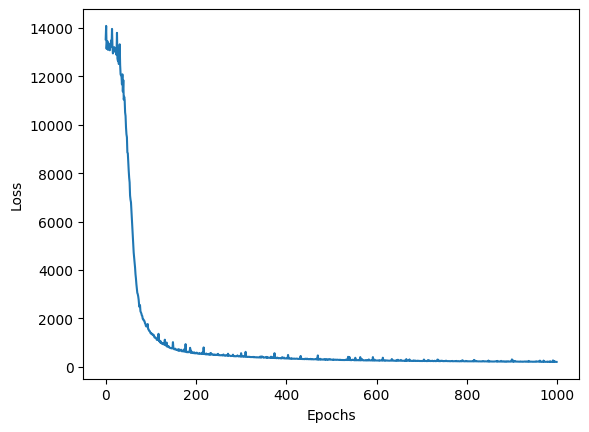

In [23]:
plt.plot(range(num_epochs), epoch_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [26]:
#모델 성능평가

from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model(X_test)
print('y_test_pred.requires_grad= ', y_test_pred.requires_grad)
print('y_test.requires_grad= ', y_test.requires_grad)
mse = mean_squared_error(y_test_pred.detach().cpu().numpy(), y_test.detach().cpu().numpy())
print('MSE: {:.4f}'.format(mse))
R2 = r2_score(y_test_pred.detach().cpu().numpy(), y_test.detach().cpu().numpy())
print( 'R2: {:.4f}'.format(R2))

y_test_pred.requires_grad=  True
y_test.requires_grad=  False
MSE: 8.0051
R2: 0.8976


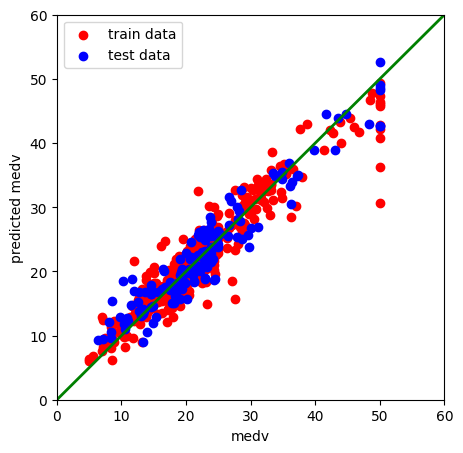

In [27]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

plt.figure(figsize=(5,5), dpi=100)
plt.xlabel("medv")
plt.ylabel("predicted medv")
plt.xlim(0, 60)
plt.ylim(0, 60)

plt.scatter(y_train, y_train_pred, lw=1, color = 'r', label = 'train data')
plt.scatter(y_test, y_test_pred, lw=1, color = 'b', label = 'test data')
plt.plot([0,60],[0,60],color = 'green', lw=2, linestyle='solid')
plt.legend()
plt.show()

예제 4.2 당뇨병 발병 유무 분류

In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('학습을 진행하는 기기: ', device)

diabetes = pd.read_csv('pima-indians-diabetes.csv')
print(diabetes.info())
print(diabetes.head())

학습을 진행하는 기기:  cpu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2

In [31]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
# Convert from Pandas dataframe to numpy arrays
X = diabetes.drop(labels = ['Outcome'], axis = 1).values
y = diabetes[['Outcome']].values

print(type(X))
print(type(y))
print(X.shape, y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(768, 8) (768, 1)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614, 1) (154, 1)


In [35]:
#Creating Tensors
X_train = torch.FloatTensor(X_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_train = torch.LongTensor(y_train).to(device)
y_test = torch.LongTensor(y_test).to(device)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([614, 8]) torch.Size([154, 8]) torch.Size([614, 1]) torch.Size([154, 1])


In [36]:
dataset = torch.utils.data.TensorDataset(X_train,y_train)

In [37]:
torch.manual_seed(0)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

In [38]:
#Creating the model
class Diabetes_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(X_train.shape[1], 20)
    self.fc2 = nn.Linear(20,10)
    self.fc3 = nn.Linear(10,2)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
model = Diabetes_model().to(device)
print(model.parameters)

<bound method Module.parameters of Diabetes_model(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=2, bias=True)
)>


In [39]:
# Define the loss function and optimizer
learning_rate = 0.0001
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [41]:
num_epochs = 2000
epoch_loss = []
for epoch in range(num_epochs):
  running_loss = 0.0
  for inputs, labels in trainloader:
    y_pred = model(inputs)
    loss = loss_function(y_pred, labels.view(-1))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    running_loss += loss.item()
  
  epoch_loss.append(running_loss)

  if(epoch==0):
    print('Epoch %d/%d loss : %.3f' % (epoch + 1, num_epochs, running_loss))
  if(epoch+1) % 100 ==0:
    print('Epoch %d/%d loss : %.3f' % (epoch + 1, num_epochs, running_loss))

Epoch 1/2000 loss : 102.391
Epoch 100/2000 loss : 22.760
Epoch 200/2000 loss : 21.899
Epoch 300/2000 loss : 21.102
Epoch 400/2000 loss : 20.683
Epoch 500/2000 loss : 20.409
Epoch 600/2000 loss : 19.959
Epoch 700/2000 loss : 19.649
Epoch 800/2000 loss : 19.470
Epoch 900/2000 loss : 19.404
Epoch 1000/2000 loss : 18.803
Epoch 1100/2000 loss : 18.800
Epoch 1200/2000 loss : 18.692
Epoch 1300/2000 loss : 18.264
Epoch 1400/2000 loss : 18.096
Epoch 1500/2000 loss : 17.896
Epoch 1600/2000 loss : 17.791
Epoch 1700/2000 loss : 17.604
Epoch 1800/2000 loss : 17.500
Epoch 1900/2000 loss : 17.379
Epoch 2000/2000 loss : 17.158


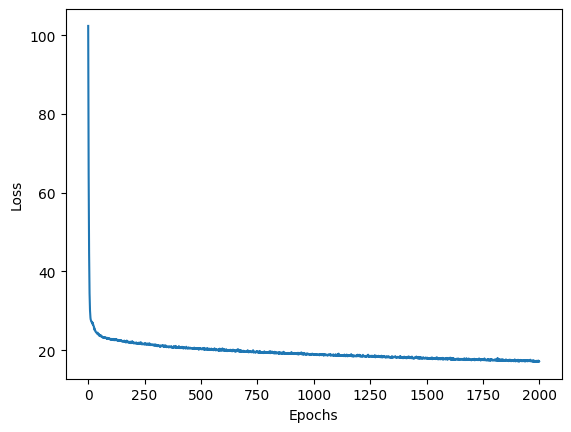

In [42]:
plt.plot(range(num_epochs), epoch_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [43]:
predictions = []
for i, data in enumerate(X_test):
  y_pred = model(data)
  predictions.append(y_pred.argmax().item())
  if (i <=10):
    print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
1
1


In [44]:
from sklearn.metrics import confusion_matrix
# confusion matrix
confusion_matrix = confusion_matrix(y_test.cpu().numpy(), predictions)
TN=confusion_matrix[0][0]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]
TP=confusion_matrix[1][1]
precision= TP/(TP+FP)
sensitivity=TP/(TP+FN)
specificity=TN/(FP+TN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print ("Confusion Matrix : \n", confusion_matrix)
print ("Precision : ", round(precision,4))
print ("Sensitivity : ", round(sensitivity,4))
print ("Specificity : ", round(specificity,4))
print ("Accuracy : ", round(accuracy,4))

Confusion Matrix : 
 [[88 19]
 [17 30]]
Precision :  0.6122
Sensitivity :  0.6383
Specificity :  0.8224
Accuracy :  0.7662


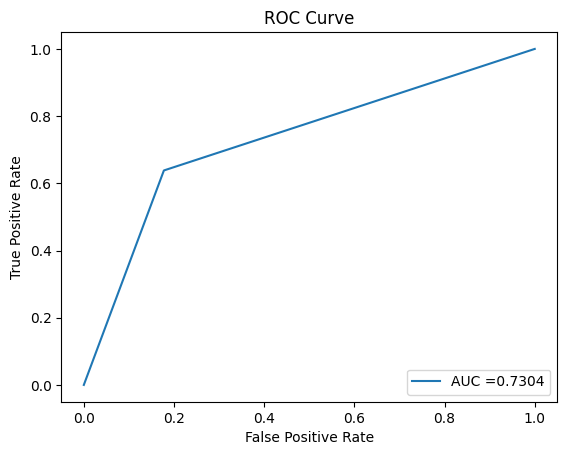

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test.cpu().numpy(),  predictions)
auc = roc_auc_score(y_test.cpu().numpy(), predictions)
auc=round(auc,4)
plt.plot(fpr,tpr,label="AUC ="+str(auc))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()